In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("C:\\Users\\S\\OneDrive - Excavate Research and Analysis Pvt Ltd\\Documents\\tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


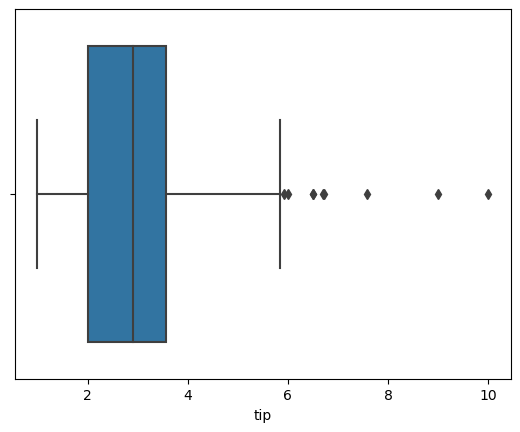

In [5]:
sns.boxplot(data,x='tip')
plt.show()

In [6]:
### we can't use quantile method beacuse of data loss
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['tip_standardized'] = scaler.fit_transform(data[['tip']])

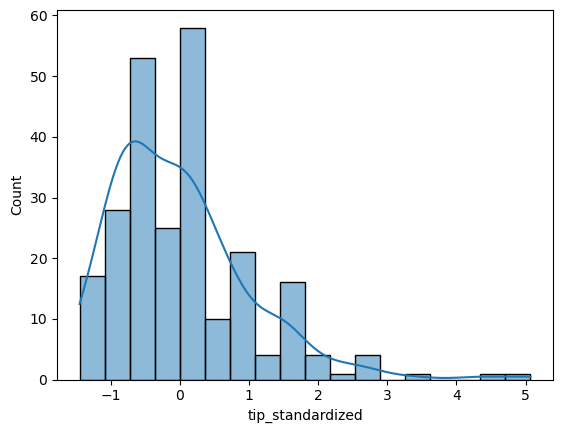

In [7]:
sns.histplot(data,x='tip_standardized',kde=True)
plt.show()

In [8]:
outliers = data[np.abs(data['tip_standardized'])>3]
outliers

,total_bill,tip,sex,smoker,day,time,size,tip_standardized
23,39.42,7.58,Male,No,Sat,Dinner,4,3.318164
170,50.81,10.00,Male,Yes,Sat,Dinner,3,5.070772
212,48.33,9.00,Male,No,Sat,Dinner,4,4.346554


In [9]:
no_outlier=data[np.abs(data['tip_standardized'])<=3]
no_outlier

,total_bill,tip,sex,smoker,day,time,size,tip_standardized
0,16.99,1.01,Female,No,Sun,Dinner,2,-1.439947
1,10.34,1.66,Male,No,Sun,Dinner,3,-0.969205
2,21.01,3.50,Male,No,Sun,Dinner,3,0.363356
3,23.68,3.31,Male,No,Sun,Dinner,2,0.225754
4,24.59,3.61,Female,No,Sun,Dinner,4,0.443020
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.115963
240,27.18,2.00,Female,Yes,Sat,Dinner,2,-0.722971
241,22.67,2.00,Male,Yes,Sat,Dinner,2,-0.722971
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.904026


In [10]:
data=no_outlier.drop(columns=['tip_standardized'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  241 non-null    float64
 1   tip         241 non-null    float64
 2   sex         241 non-null    object 
 3   smoker      241 non-null    object 
 4   day         241 non-null    object 
 5   time        241 non-null    object 
 6   size        241 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ KB


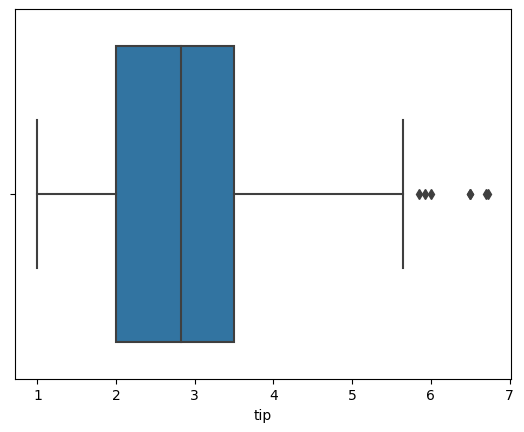

In [12]:
sns.boxplot(data,x='tip')
plt.show()

In [13]:
Q1=np.percentile(data['tip'],25)
Q3=np.percentile(data['tip'],75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[~((data['tip']<lower_bound) | (data['tip']>upper_bound))]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  234 non-null    float64
 1   tip         234 non-null    float64
 2   sex         234 non-null    object 
 3   smoker      234 non-null    object 
 4   day         234 non-null    object 
 5   time        234 non-null    object 
 6   size        234 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ KB


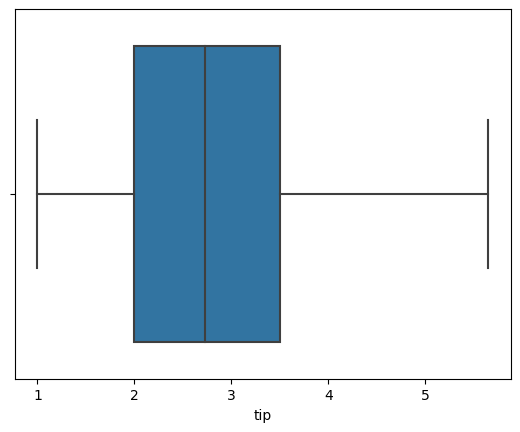

In [15]:
sns.boxplot(data,x='tip')
plt.show()

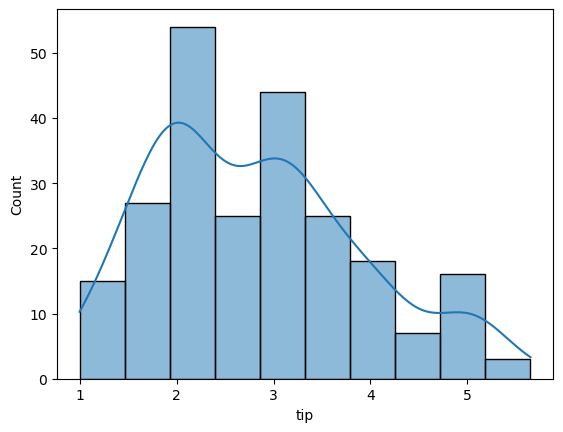

In [16]:
sns.histplot(data,x='tip',kde=True)
plt.show()

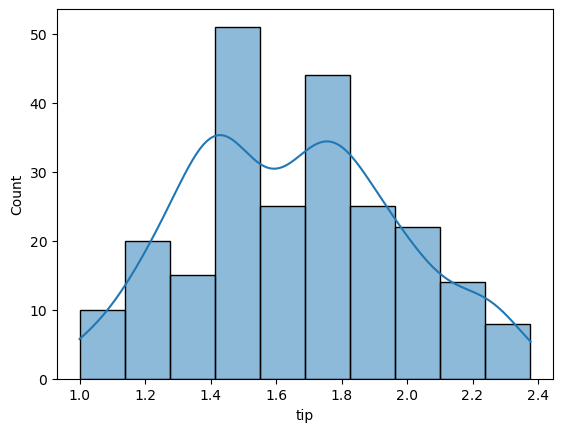

In [17]:
## then transform the data for bell curve format
data1=np.sqrt(data['tip'])
data2=pd.DataFrame(data1)
data2
sns.histplot(data2,x='tip',kde=True)
plt.show()

In [18]:
data['tip']=data1
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.004988,Female,No,Sun,Dinner,2
1,10.34,1.288410,Male,No,Sun,Dinner,3
2,21.01,1.870829,Male,No,Sun,Dinner,3
3,23.68,1.819341,Male,No,Sun,Dinner,2
4,24.59,1.900000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,2.161018,Female,No,Sat,Dinner,3
240,27.18,1.414214,Female,Yes,Sat,Dinner,2
241,22.67,1.414214,Male,Yes,Sat,Dinner,2
242,17.82,1.322876,Male,No,Sat,Dinner,2


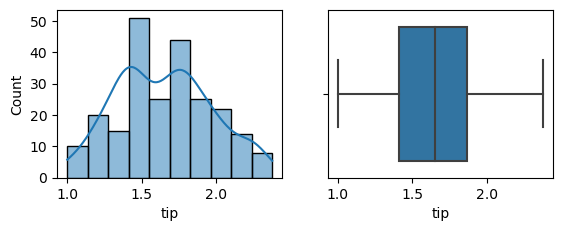

In [19]:
plt.subplot(2,2,1)
sns.histplot(data,x='tip',kde=True)
plt.subplot(2,2,2)
sns.boxplot(data,x='tip')
plt.show()

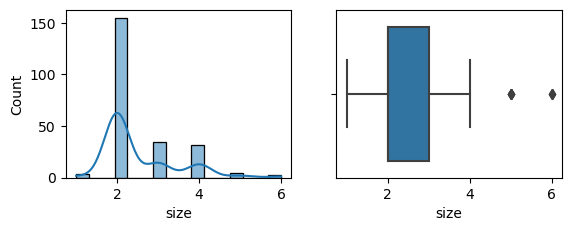

In [20]:
plt.subplot(2,2,1)
sns.histplot(data,x='size',kde=True)
plt.subplot(2,2,2)
sns.boxplot(data,x='size')
plt.show()

In [21]:
filtered = data[data['size']>=5]
filtered

,total_bill,tip,sex,smoker,day,time,size
125,29.80,2.049390,Female,No,Thur,Lunch,6
142,41.19,2.236068,Male,No,Thur,Lunch,5
143,27.05,2.236068,Female,No,Thur,Lunch,6
155,29.85,2.267157,Female,No,Sun,Dinner,5
156,48.17,2.236068,Male,No,Sun,Dinner,6
185,20.69,2.236068,Male,No,Sun,Dinner,5
187,30.46,1.414214,Male,Yes,Sun,Dinner,5
216,28.15,1.732051,Male,Yes,Sat,Dinner,5


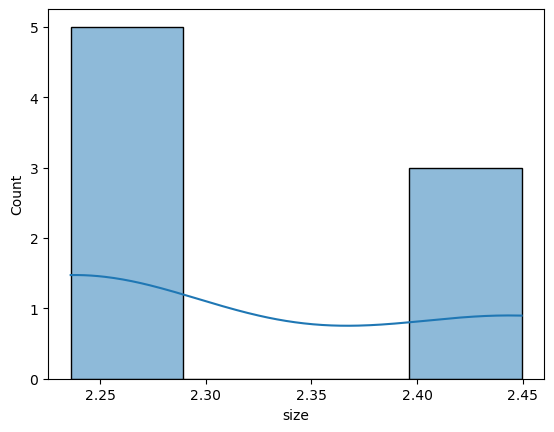

In [22]:
data_size=np.sqrt(filtered['size'])
data_size2=pd.DataFrame(data_size)
sns.histplot(data_size2,x='size',kde=True)
plt.show()

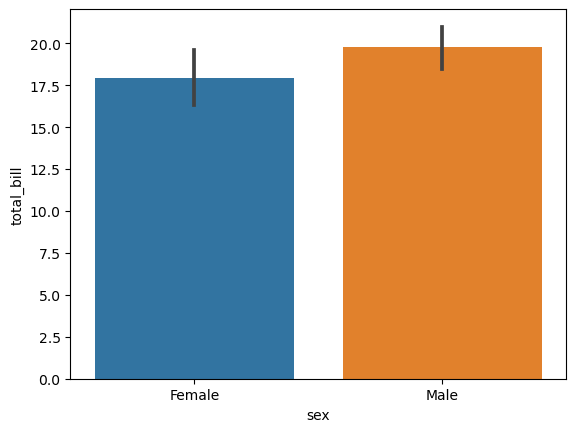

In [23]:
sns.barplot(data,x='sex',y='total_bill')
plt.show()

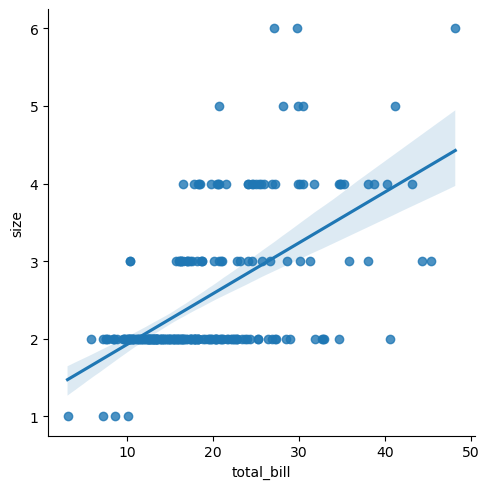

In [24]:
sns.lmplot(data,x='total_bill',y='size')
plt.show()

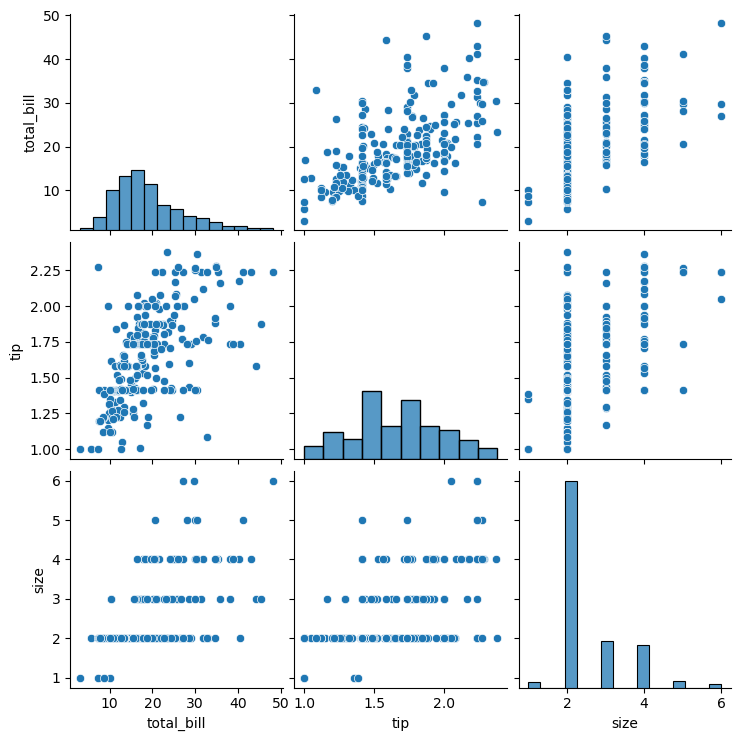

In [25]:
sns.pairplot(data)
plt.show()

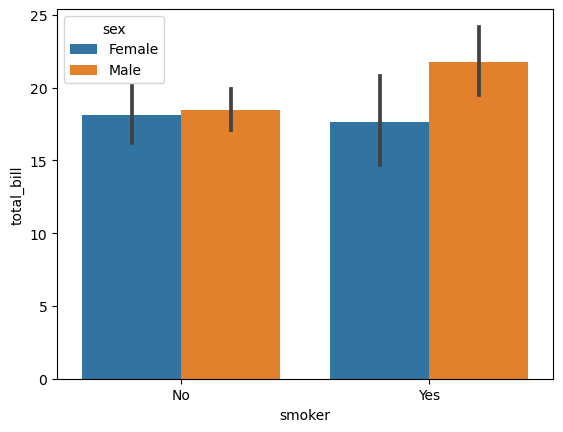

In [26]:
sns.barplot(data,y='total_bill',x='smoker',hue='sex')
plt.show()

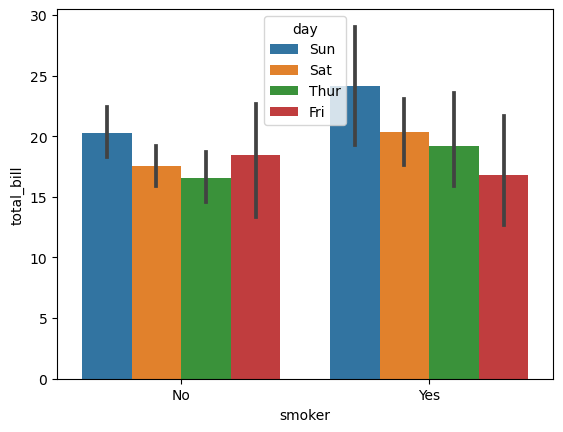

In [27]:
sns.barplot(data,y='total_bill',x='smoker',hue='day')
plt.show()

In [28]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)
data['smoker']=pd.get_dummies(data['smoker'],drop_first=True)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.004988,0,0,Sun,Dinner,2
1,10.34,1.288410,1,0,Sun,Dinner,3
2,21.01,1.870829,1,0,Sun,Dinner,3
3,23.68,1.819341,1,0,Sun,Dinner,2
4,24.59,1.900000,0,0,Sun,Dinner,4


In [29]:
from sklearn.preprocessing import LabelEncoder
lbencode=LabelEncoder()
data['day']=lbencode.fit_transform(data['day'])
data['time']=lbencode.fit_transform(data['time'])

In [30]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,19.098974,1.649572,0.632479,0.384615,1.747863,0.282051,2.521368
std,8.185805,0.321383,0.483164,0.487547,0.931389,0.450963,0.918090
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.187500,1.414214,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.385000,1.652268,1.000000,0.000000,2.000000,0.000000,2.000000
75%,23.030000,1.870829,1.000000,1.000000,3.000000,1.000000,3.000000
max,48.170000,2.376973,1.000000,1.000000,3.000000,1.000000,6.000000


In [31]:
correlation_matrix1=data.corr()
correlation_matrix1

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.595309,0.108224,0.117521,-0.012368,-0.176804,0.584110
tip,0.595309,1.000000,0.027348,0.020848,0.028605,-0.116633,0.454098
sex,0.108224,0.027348,1.000000,0.019621,-0.082818,-0.211621,0.056481
smoker,0.117521,0.020848,0.019621,1.000000,-0.286450,-0.046548,-0.123911
day,-0.012368,0.028605,-0.082818,-0.286450,1.000000,0.629858,0.074086
time,-0.176804,-0.116633,-0.211621,-0.046548,0.629858,1.000000,-0.107914
size,0.584110,0.454098,0.056481,-0.123911,0.074086,-0.107914,1.000000


In [32]:
X=data.drop(columns=['total_bill'])
y=data['total_bill']

In [33]:
cor_indepen=X.corr(method='pearson')
cor_indepen

,tip,sex,smoker,day,time,size
tip,1.000000,0.027348,0.020848,0.028605,-0.116633,0.454098
sex,0.027348,1.000000,0.019621,-0.082818,-0.211621,0.056481
smoker,0.020848,0.019621,1.000000,-0.286450,-0.046548,-0.123911
day,0.028605,-0.082818,-0.286450,1.000000,0.629858,0.074086
time,-0.116633,-0.211621,-0.046548,0.629858,1.000000,-0.107914
size,0.454098,0.056481,-0.123911,0.074086,-0.107914,1.000000


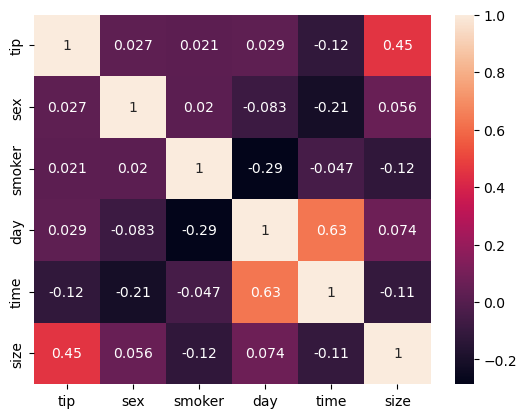

In [34]:
sns.heatmap(cor_indepen,annot=True)
plt.show()

In [35]:
## if our threshold value is 70 %(0.7) means if the correlation of two independent feature is 70 or More than 70,for that case we will keep 1 of 2
## here i means row j means column example:- i=size then for i=size we will do iteration columnwise like (j=tip,sex,smoker,day,time,size) , similarly
## for i=time we will do iteration columnwise like (j=tip,sex,smoker,day,time,size) and so on till i=day,smoker,....,tip

def correlation(dataset,threshold): ## threshold =70%
    corr_column=set()     # create  empty set to keep highly correlated feature
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: ## check if correlation of [i,j] >70% 
                column=corr_matrix.columns[i]      ## then we extract that feature 
                corr_column.add(column)     ## after that we add that feature into empty set
    return corr_column
corr_feature=correlation(X,0.8)    

In [36]:
corr_feature

set()

In [37]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# Define the model
model = LinearRegression()

# Define K-Fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)


Define Models and Parameter Grids:

In [40]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}

Perform Grid Search with Cross-Validation:

In [41]:
# Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=kf, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f"Best parameters for Ridge: {ridge_grid.best_params_}")
print(f"Best CV score for Ridge: {-ridge_grid.best_score_}")


Best parameters for Ridge: {'alpha': 1}
Best CV score for Ridge: 34.33788978921111


In [42]:
# Lasso
lasso_grid = GridSearchCV(lasso, lasso_params, cv=kf, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f"Best parameters for Lasso: {lasso_grid.best_params_}")
print(f"Best CV score for Lasso: {-lasso_grid.best_score_}")


Best parameters for Lasso: {'alpha': 0.1}
Best CV score for Lasso: 34.41160463453722


Train Final Model on Full Training Set:

In [43]:
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

Evaluate on Test Set:

In [44]:
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)


print(f"Ridge Test MSE: {mean_squared_error(y_test, ridge_pred)}")
print(f"Lasso Test MSE: {mean_squared_error(y_test, lasso_pred)}")

Ridge Test MSE: 36.56777656122697
Lasso Test MSE: 36.918653405553094


In [45]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(f"Ridge Test MSE: {mean_squared_error(y_test, prediction)}")

Ridge Test MSE: 36.28349869832025


In [46]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
score1=model1.predict(X_test)

In [47]:
print(f"Ridge Test MSE: {mean_squared_error(y_test, score1)}")

Ridge Test MSE: 36.52931019981118


In [48]:
from sklearn.metrics import r2_score

In [49]:
print(r2_score(y_test,prediction))

0.37888501760766435
